In [6]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Set base directory
base_dir = '/Users/namigabbasov/Desktop/Projects-Fall-2024/RetinoVision/APTOS_Filtered'
train_csv_path = os.path.join(base_dir, 'train.csv')

# Load the CSV file
df = pd.read_csv(train_csv_path)

# Update image path construction for .png files, assuming the folders are named 0, 1, 2, 3, 4
df['image_path'] = df.apply(lambda row: os.path.join(base_dir, str(row['diagnosis']), row['id_code'] + '.png'), axis=1)

# Convert the diagnosis column to string
df['diagnosis'] = df['diagnosis'].astype(str)

# Check again for any missing files
missing_files = df[~df['image_path'].apply(os.path.exists)]

if not missing_files.empty:
    print("Missing files:")
    print(missing_files)
else:
    print("All image files are present.")

# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['diagnosis'])

# Image Data Generators for loading and augmenting images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Create image generators
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

# Evaluate the model
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation Accuracy: {val_acc:.2f}')

# Save the model
model.save(os.path.join(base_dir, 'retinopathy_cnn_model.h5'))

# Predict on a new image (Example)
# img_path = os.path.join(base_dir, '0', 'example_image.png')
# img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
# img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
# img_array = np.expand_dims(img_array, axis=0)
# prediction = model.predict(img_array)
# predicted_class = np.argmax(prediction)
# print(f'Predicted Class: {predicted_class}')


All image files are present.
Found 2929 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


/Users/namigabbasov/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


2024-08-27 16:46:10.981425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/namigabbasov/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 293ms/step - accuracy: 0.5008 - loss: 1.3801 - val_accuracy: 0.6357 - val_loss: 1.0492
Epoch 2/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 292ms/step - accuracy: 0.6233 - loss: 1.0169 - val_accuracy: 0.6917 - val_loss: 0.9621
Epoch 3/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 292ms/step - accuracy: 0.6628 - loss: 0.9730 - val_accuracy: 0.6671 - val_loss: 1.0782
Epoch 4/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - accuracy: 0.6589 - loss: 0.9679 - val_accuracy: 0.7012 - val_loss: 0.9015
Epoch 5/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 287ms/step - accuracy: 0.6787 - loss: 0.9173 - val_accuracy: 0.6835 - val_loss: 0.9897
Epoch 6/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 287ms/step - accuracy: 0.6810 - loss: 0.8894 - val_accuracy: 0.6930 - val_loss: 0.9299
Epoch 7/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 287ms/step - accuracy: 0.6604 - loss: 0.9258 - val_accuracy: 0.7012 - val_loss: 0.9216
Epoch 8/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 286ms/step - accuracy: 0.6869 - loss: 0.8759 - val_accuracy: 0.705

Validation Accuracy: 0.72


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.7038 - loss: 0.8638
Validation Loss: 0.80
Validation Accuracy: 0.72
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step


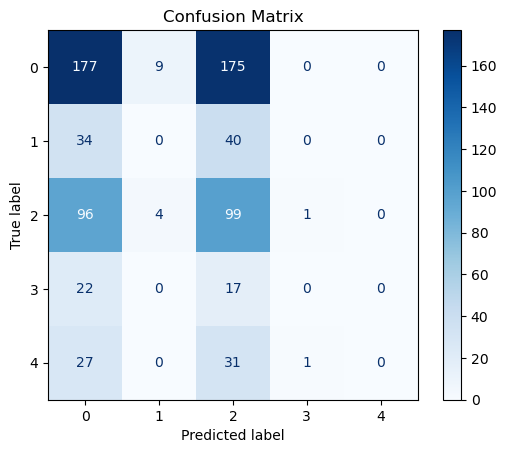

              precision    recall  f1-score   support

           0       0.50      0.49      0.49       361
           1       0.00      0.00      0.00        74
           2       0.27      0.49      0.35       200
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00        59

    accuracy                           0.38       733
   macro avg       0.15      0.20      0.17       733
weighted avg       0.32      0.38      0.34       733



/Users/namigabbasov/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/namigabbasov/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/namigabbasov/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation Loss: {val_loss:.2f}')
print(f'Validation Accuracy: {val_acc:.2f}')

# Predict the classes on the validation data
val_predictions = model.predict(val_generator)
val_pred_classes = np.argmax(val_predictions, axis=1)
true_classes = val_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(true_classes, val_pred_classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_generator.class_indices.keys())
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_classes, val_pred_classes, target_names=val_generator.class_indices.keys()))

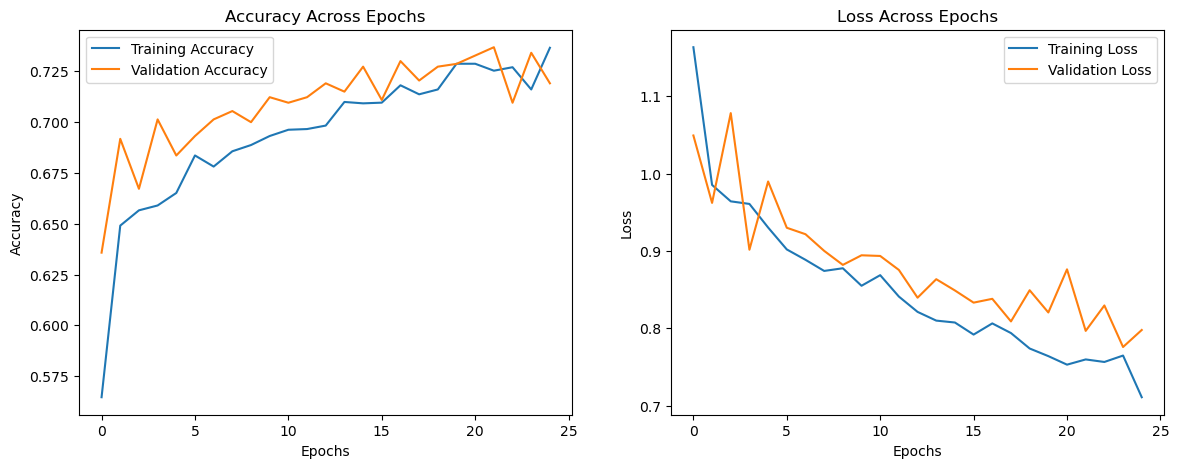

In [8]:
# Plot accuracy across epochs
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

All image files are present.
Found 2929 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


/Users/namigabbasov/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


/Users/namigabbasov/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 299ms/step - accuracy: 0.4883 - loss: 1.3738 - val_accuracy: 0.5020 - val_loss: 1.5560
Epoch 2/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 302ms/step - accuracy: 0.6032 - loss: 1.1140 - val_accuracy: 0.6030 - val_loss: 1.0661
Epoch 3/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 299ms/step - accuracy: 0.6037 - loss: 1.0681 - val_accuracy: 0.6139 - val_loss: 1.0409
Epoch 4/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 303ms/step - accuracy: 0.6152 - loss: 1.0448 - val_accuracy: 0.6453 - val_loss: 0.9787
Epoch 5/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 300ms/step - accuracy: 0.6218 - loss: 1.0308 - val_accuracy: 0.5771 - val_loss: 1.1094
Epoch 6/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 298ms/step - accuracy: 0.6170 - loss: 1.0695 - val_accuracy: 0.6221 - val_loss: 1.0039
Epoch 7/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 303ms/step - accuracy: 0.6309 - loss: 1.0244 - val_accuracy: 0.6426 - val_loss: 0.9950
Epoch 8/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 312ms/step - accuracy: 0.6124 - loss: 1.0431 - val_accuracy: 0.626

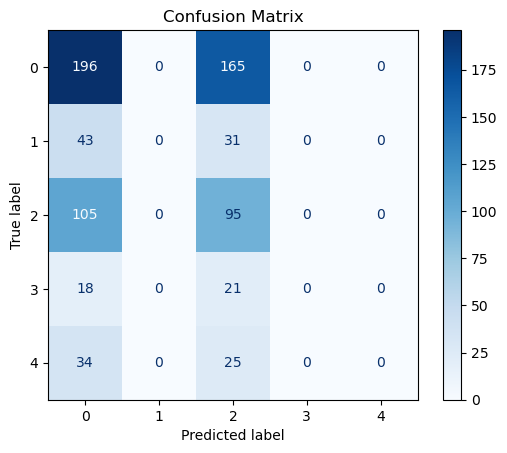

              precision    recall  f1-score   support

           0       0.49      0.54      0.52       361
           1       0.00      0.00      0.00        74
           2       0.28      0.47      0.35       200
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00        59

    accuracy                           0.40       733
   macro avg       0.16      0.20      0.17       733
weighted avg       0.32      0.40      0.35       733



/Users/namigabbasov/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/namigabbasov/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/namigabbasov/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


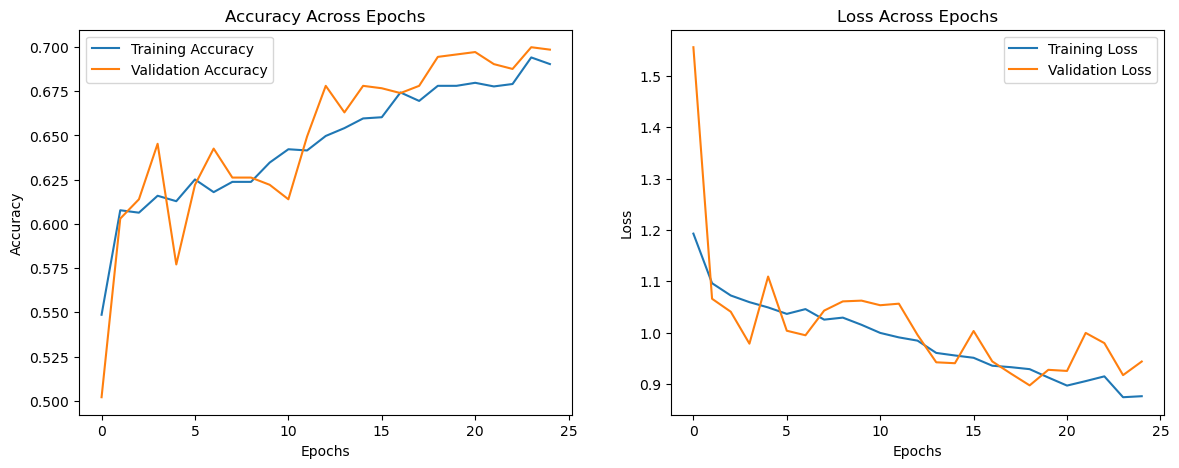

In [9]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Set base directory
base_dir = '/Users/namigabbasov/Desktop/Projects-Fall-2024/RetinoVision/APTOS_Filtered'
train_csv_path = os.path.join(base_dir, 'train.csv')

# Load the CSV file
df = pd.read_csv(train_csv_path)

# Update image path construction for .png files, assuming the folders are named 0, 1, 2, 3, 4
df['image_path'] = df.apply(lambda row: os.path.join(base_dir, str(row['diagnosis']), row['id_code'] + '.png'), axis=1)

# Convert the diagnosis column to string
df['diagnosis'] = df['diagnosis'].astype(str)

# Check again for any missing files
missing_files = df[~df['image_path'].apply(os.path.exists)]

if not missing_files.empty:
    print("Missing files:")
    print(missing_files)
else:
    print("All image files are present.")

# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['diagnosis'])

# Image Data Generators with more aggressive data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Create image generators
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation Loss: {val_loss:.2f}')
print(f'Validation Accuracy: {val_acc:.2f}')

# Predict the classes on the validation data
val_predictions = model.predict(val_generator)
val_pred_classes = np.argmax(val_predictions, axis=1)
true_classes = val_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(true_classes, val_pred_classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_generator.class_indices.keys())
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_classes, val_pred_classes, target_names=val_generator.class_indices.keys()))

# Plot accuracy and loss across epochs
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()